
## 선형회귀분석
- 미국 보스턴시의 주택가격 자료를 사용하여 아래 분석 실행.
    - 선형회귀분석 및 잔차 분석
    - 영향점 제거한 선형회귀분석
    - 변수선택법(best subset selection, 전진선택법, 후진선택법)
    
### Boston 자료 설명
- 자료 수는 506이고, 총 14개의 변수로 이루어져있다.
- 설명 변수: 마을의 평균 범죄율 (crim), 주거지 비율 (zn), 상업용지비율 (indus), 강 인접여부 (chas), 질소산화물의 농도 (nox), 집 당 평균 방의 수 (rm), 자가거주 주택 비율 (age), 보스턴의 5개 고용 중심지와의 가중 평균 거리 (dis), 고속도로 접근 지수 (rad), 10000달러 당 재산세 비율 (tax), 마을의 교사당 학생 비율 (ptratio), 마을의 흑인 비율 (black), 하층민의 비율 (lstat)
- 반응변수: 자가거주 주택의 중앙값 (medv)

### 데이터 불러오기

In [1]:
import pandas as pd
Boston = pd.read_csv("Boston.csv")
print('Data shape:', Boston.shape)
Boston = Boston.iloc[:, 1:]
Boston.head()

Data shape: (506, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
# pip install statsmodels

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

train, test = train_test_split(Boston, test_size = 0.3, random_state = 42) # random_state는 random 고정하는 역할
X_train, y_train = train.drop("medv", axis = 1), train.medv
X_train = sm.add_constant(X_train) #X에다 1을 부침 칼럼이 하나 생김. 그게 다 1로 채워져있음
X_test, y_test = test.drop("medv", axis = 1), test.medv
X_test= sm.add_constant(X_test)

c:\users\ds\pycharmprojects\ds2\venv\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [4]:
linear_model = sm.OLS(y_train, X_train)
model_fit = linear_model.fit()
print(model_fit.summary()) # p값이 작은게 의미 없는 것!! 그거 빼고 다시 돌리는게 좋을듯

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Fri, 23 Aug 2019   Prob (F-statistic):           4.96e-92
Time:                        16:54:53   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

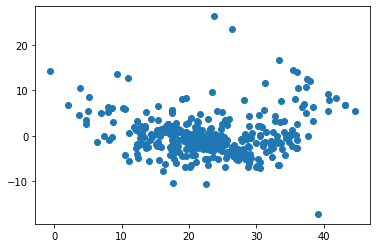

In [6]:
import matplotlib.pyplot as plt 
plt.plot(model_fit.fittedvalues, model_fit.resid,'o') # resid는 잔차
plt.show() # 0근처에 나와야 선형성이 있는 것!!! 다른 column들을 제거하고 하면 좋을 듯